### Contents

1. Import Data
2. Task 1: Build Protein Thesaurus
    1. Associated Disease
    2. Disease Mechanism
3. Task 2: Build Protein/Gene Interactions
4. Conclusion

### Import Data

In [1]:
# read task file to import data
import os

## path
notebook_path = os.path.abspath("Life_Science_Dev_Test.ipynb")
path=notebook_path.rsplit('/',1)[0]+'/life_science_resource_dev_task/'

## import instruction file
file = open(path+'life_science_resource_dev_task.txt','r+')
file_list = file.readlines()

### Task 1: Build Protein Thesaurus

In [2]:
# extract protein symbols
s_ind = [i for i,v in enumerate(file_list) if 'following 16 proteins' in v]
e_ind = [i for i,v in enumerate(file_list) if 'Please divide the proteins into specific families' in v]
gene_list = [i.replace('\n','') for i in file_list[s_ind[0]+2:e_ind[0]-1]]

In [3]:
gene_list

['ABCC8',
 'CACNA1A',
 'FRAP1',
 'INS',
 'INSR',
 'IRS1',
 'KCNJ11',
 'KRAS',
 'MAP2K1',
 'PIK3CA',
 'PPARG',
 'PTPN1',
 'RAF1',
 'RPS6KB1',
 'SLC2A2',
 'SOS1']

In [4]:
# assign protein family from Uniprot
## Gene Ontology (GO) molecular function terms are used
protein_family = {
    'binding':['INS','INSR','IRS1','KCNJ11','PPARG'],
    'GTPase activity':['KRAS','SOS1'],
    'kinase activity':['FRAP1','MAP2K1','PIK3CA','RAF1','RPS6KB1'],
    'phosphatase activity':['PTPN1'],
    'transporter activity':['ABCC8','CACNA1A','SLC2A2']
}

# retrieve synonyms for genes from Entrez
gene_synonyms = {
    'ABCC8':['ABC36', 'HHF1', 'MRP8', 'PNDM3','TNDM2'],
    'CACNA1A':['APCA', 'CACNL1A4', 'DEE42', 'EIEE42','SCA6'],
    'FRAP1':['SKS', 'FRAP', 'FRAP2', 'RAFT1', 'RAPT1'],
    'INS':['IDDM', 'ILPR', 'IRDN', 'MODY10', 'PNDM4'],
    'INSR':['CD220', 'HHF5'],
    'IRS1':['HIRS-1'],
    'KCNJ11':['BIR', 'HHF2', 'IKATP', 'KIR6.2', 'MODY13', 'PHHI'],
    'KRAS':['C-K-RAS', 'CFC2', 'K-Ras', 'RALD', 'RASK2'],
    'MAP2K1':['CFC3', 'MAPKK1', 'MEK1', 'MEL', 'PRKMK1'],
    'PIK3CA':['CLAPO', 'MCM', 'PI3K', 'PI3K-alpha', 'p110-alpha'],
    'PPARG':['CIMT1', 'GLM1', 'NR1C3', 'PPARG1', 'PPARgamma'],
    'PTPN1':[' PTP1B'],
    'RAF1':['CMD1NN', 'CRAF', 'NS5', 'Raf-1', 'c-Raf'],
    'RPS6KB1':[' PS6K', 'S6K', 'S6K-beta-1', 'S6K1', 'STK14A'],
    'SLC2A2':['GLUT2'],
    'SOS1':['GF1', 'GINGF', 'HGF', 'NS4', 'SOS-1']
}

In [5]:
# create protein thesaurus

protein_thes = ''
for gene in gene_synonyms:
    for fam in protein_family:
        if gene in protein_family[fam]:
            #print(fam.split(' ')[0]+'_'+gene)
            protein_thes = protein_thes+fam.split(' ')[0]+'_'+gene+'\n'
    #print('\t'+'PT '+gene)
    protein_thes = protein_thes+'\t'+'PT '+gene+'\n'
    for syn in gene_synonyms[gene]:
        #print('\t'+'SYN '+syn)
        protein_thes = protein_thes+'\t'+'SYN '+syn+'\n'
        
# write to file
with open(path+'Task1_Output.txt','w') as f:
    f.write(protein_thes)
    

In [6]:
print(protein_thes)

transporter_ABCC8
	PT ABCC8
	SYN ABC36
	SYN HHF1
	SYN MRP8
	SYN PNDM3
	SYN TNDM2
transporter_CACNA1A
	PT CACNA1A
	SYN APCA
	SYN CACNL1A4
	SYN DEE42
	SYN EIEE42
	SYN SCA6
kinase_FRAP1
	PT FRAP1
	SYN SKS
	SYN FRAP
	SYN FRAP2
	SYN RAFT1
	SYN RAPT1
binding_INS
	PT INS
	SYN IDDM
	SYN ILPR
	SYN IRDN
	SYN MODY10
	SYN PNDM4
binding_INSR
	PT INSR
	SYN CD220
	SYN HHF5
binding_IRS1
	PT IRS1
	SYN HIRS-1
binding_KCNJ11
	PT KCNJ11
	SYN BIR
	SYN HHF2
	SYN IKATP
	SYN KIR6.2
	SYN MODY13
	SYN PHHI
GTPase_KRAS
	PT KRAS
	SYN C-K-RAS
	SYN CFC2
	SYN K-Ras
	SYN RALD
	SYN RASK2
kinase_MAP2K1
	PT MAP2K1
	SYN CFC3
	SYN MAPKK1
	SYN MEK1
	SYN MEL
	SYN PRKMK1
kinase_PIK3CA
	PT PIK3CA
	SYN CLAPO
	SYN MCM
	SYN PI3K
	SYN PI3K-alpha
	SYN p110-alpha
binding_PPARG
	PT PPARG
	SYN CIMT1
	SYN GLM1
	SYN NR1C3
	SYN PPARG1
	SYN PPARgamma
phosphatase_PTPN1
	PT PTPN1
	SYN  PTP1B
kinase_RAF1
	PT RAF1
	SYN CMD1NN
	SYN CRAF
	SYN NS5
	SYN Raf-1
	SYN c-Raf
kinase_RPS6KB1
	PT RPS6KB1
	SYN  PS6K
	SYN S6K
	SYN S6K-beta-1
	SYN S6K1
	SYN

#### Associated disease

A disese enrichment analysis was performed on DisGeNET using the browser API service

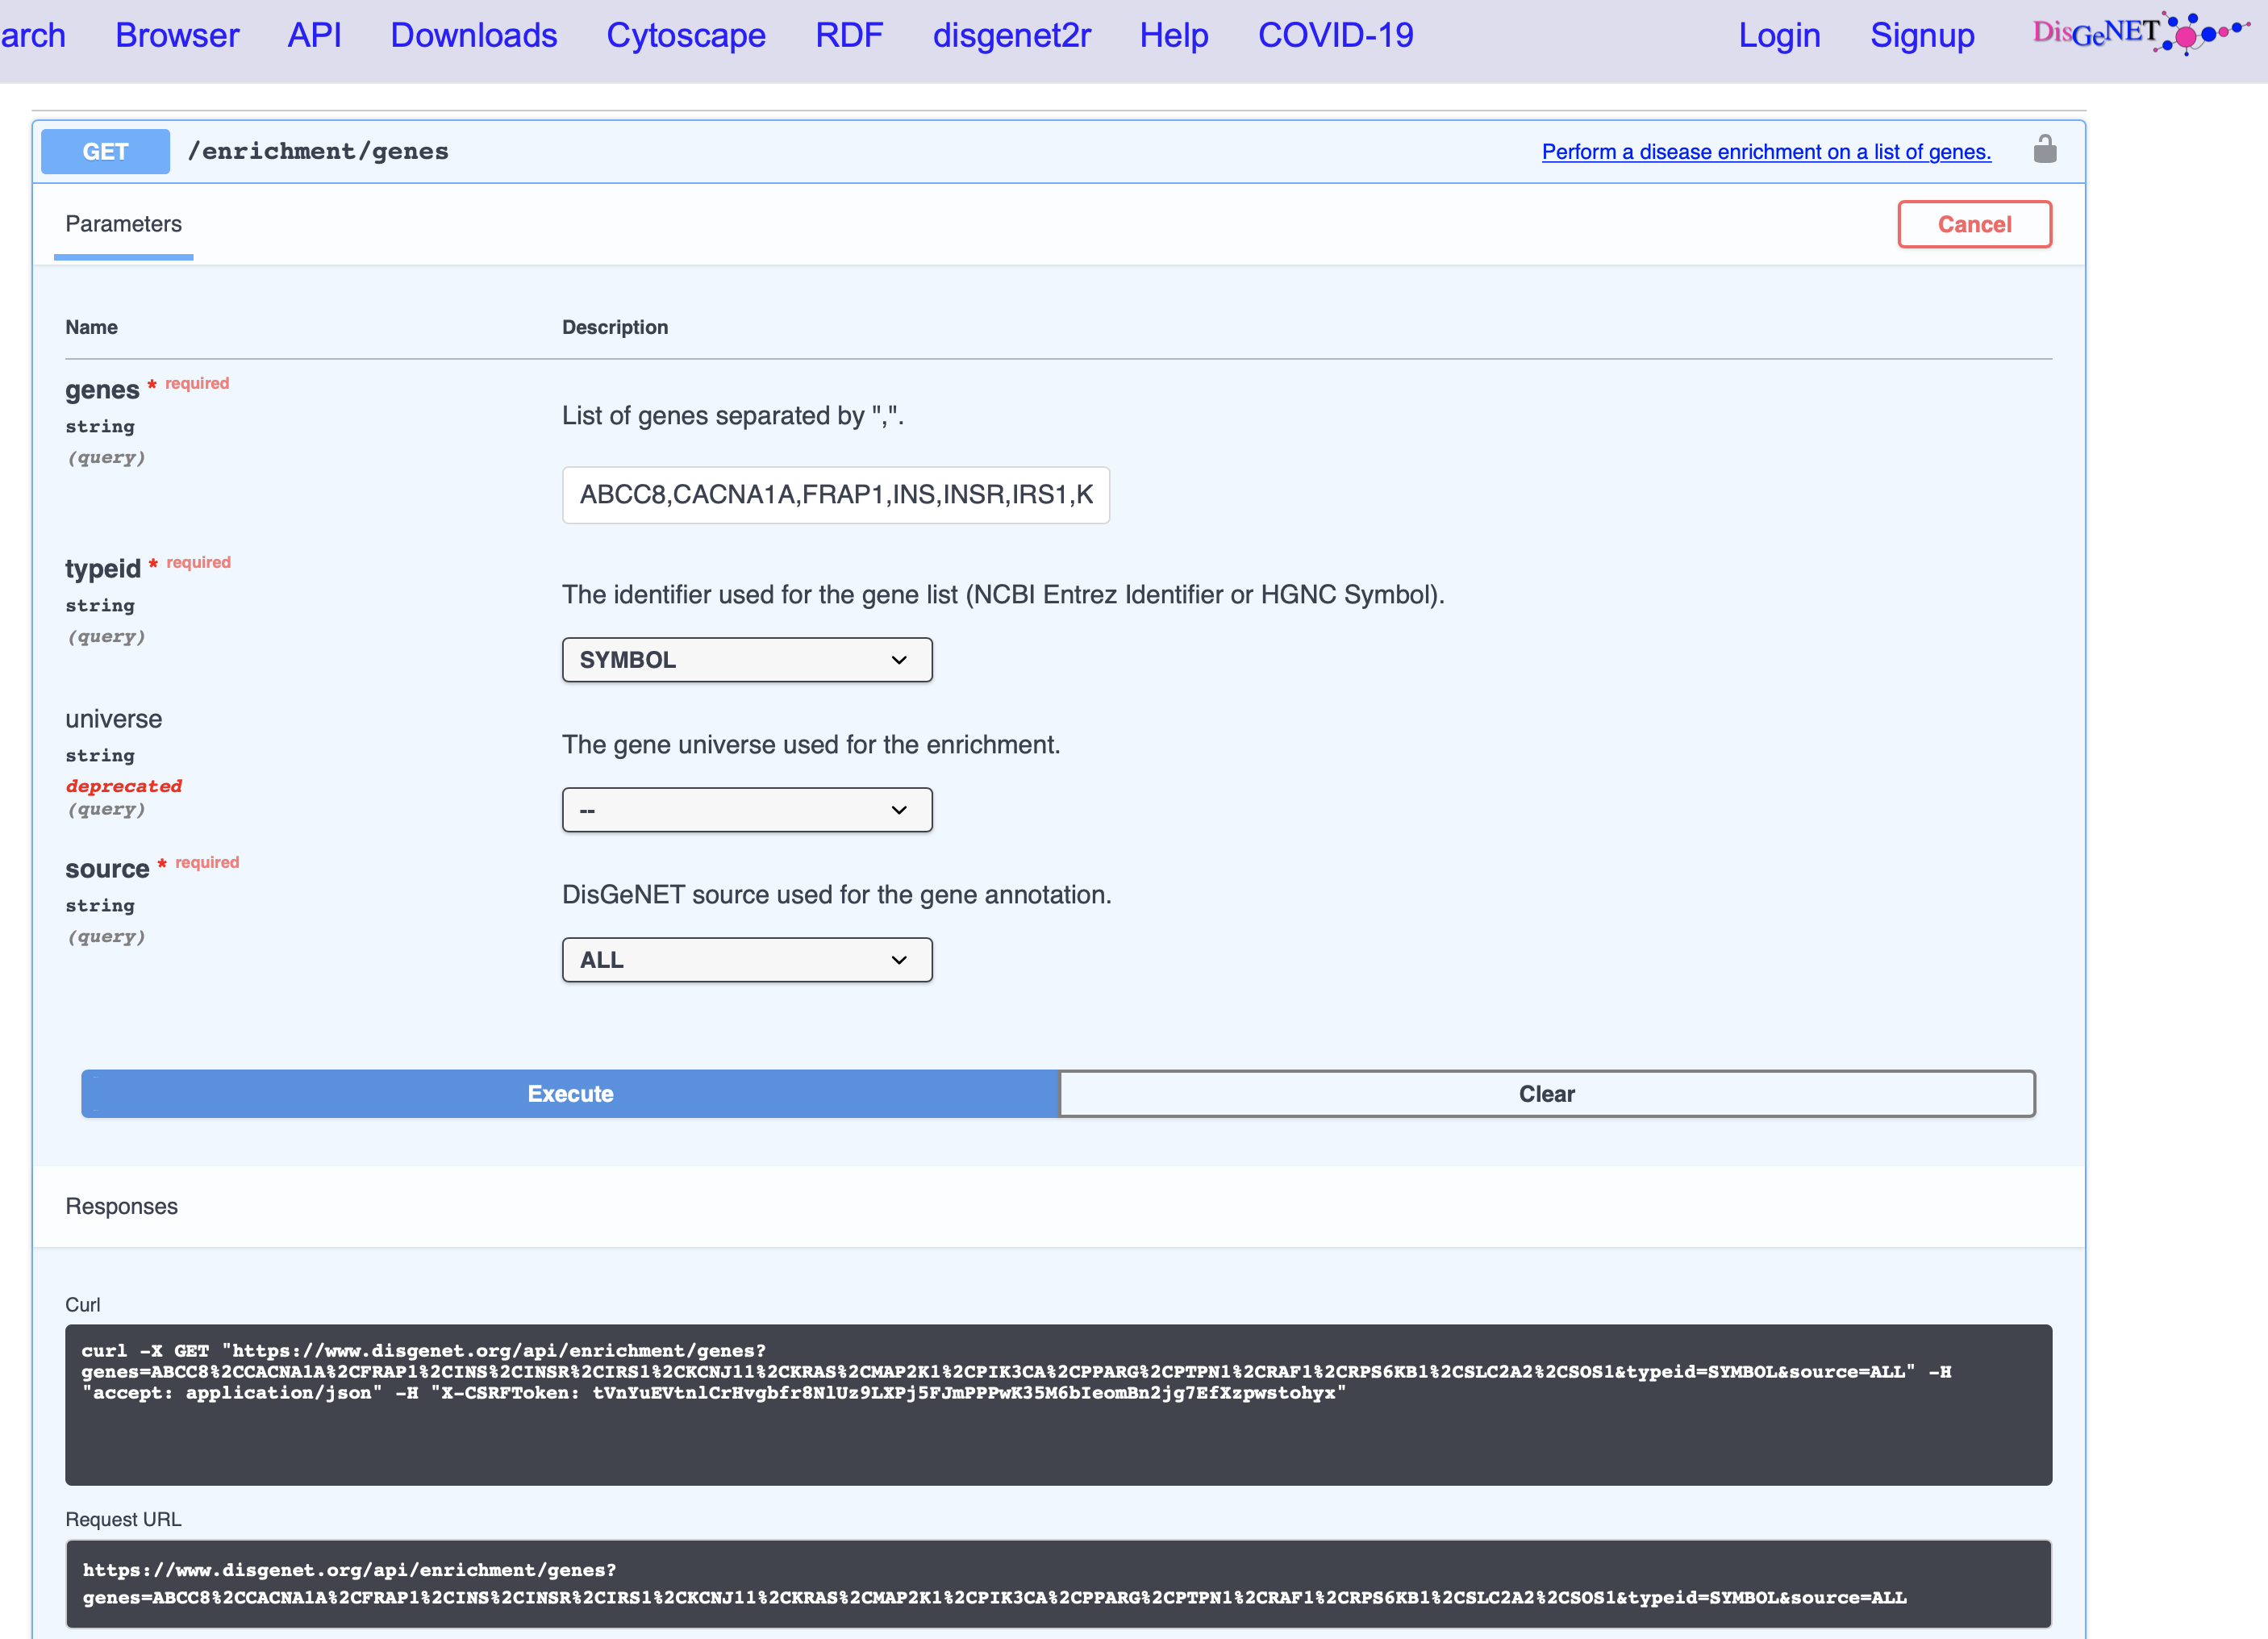

In [7]:
from IPython.display import Image

Image(path+'DisGeNET_ss.png')

In [8]:
# analyse results
import json

## read file
with open(path+'DisGeNET.json') as f:
    disease_enr = json.load(f)
    
## find enriched disease
disease_pvals = [(res['adjusted_pvalue'],res['disease_name']) for res in disease_enr['results']]
disease_pvals.sort()
top10diseases = [i[1] for i in disease_pvals[0:10]]


In [9]:
top10diseases

['Decreased waist to hip ratio',
 'Insulin Resistance',
 'LEOPARD Syndrome',
 'Impaired glucose tolerance',
 'Hypertrophic obstructive cardiomyopathy',
 'Gestational Diabetes',
 'Insulin Sensitivity',
 'Fetal Growth Retardation',
 'Diabetes Mellitus',
 'Hyperglycemia']

#### Disease Mechanism

A pathway enrichment analysis was performed in Reactome and the most significantly matched pathway was the insulin receptor signaling pathway.

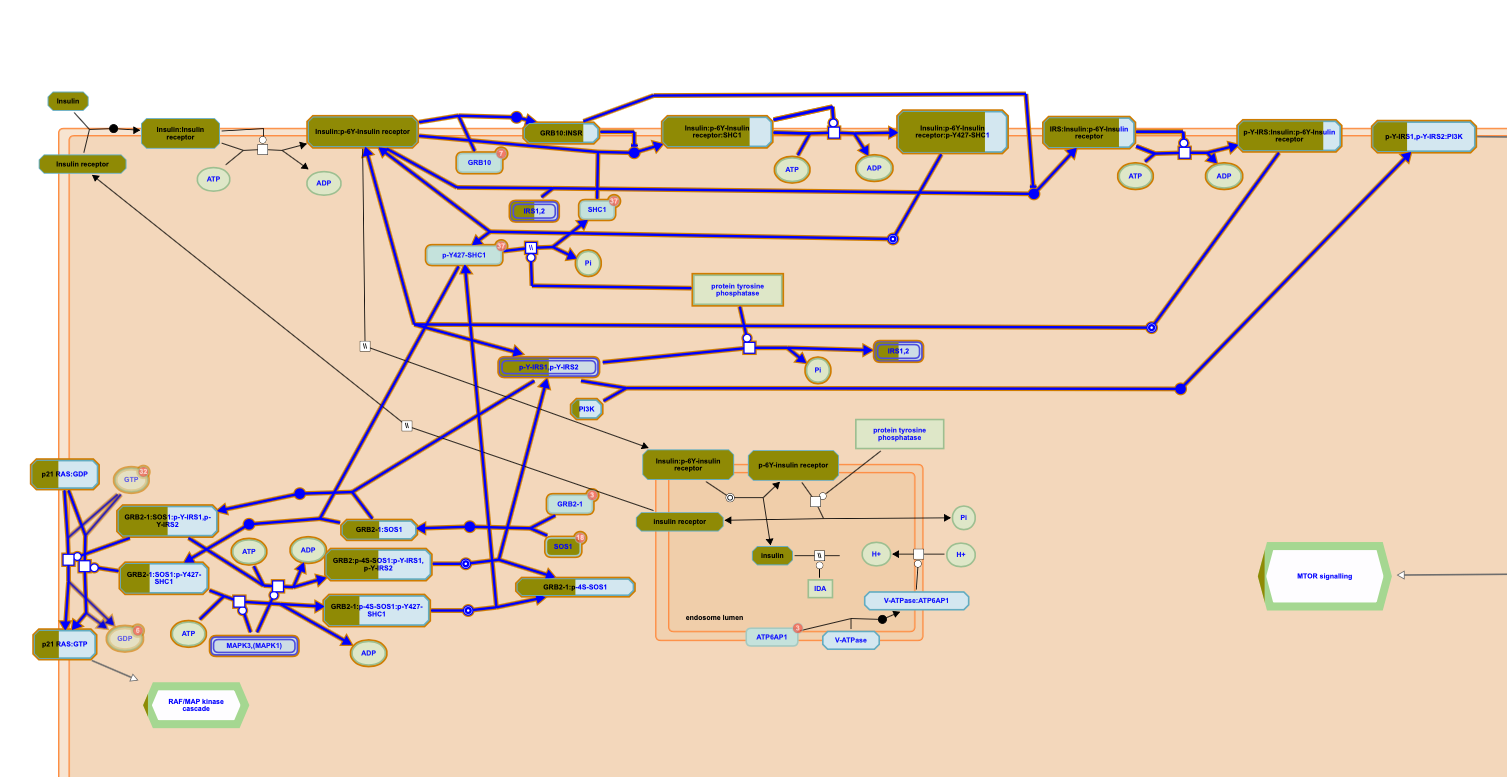

In [10]:
Image(path+'Reactome_ss.png')

### Task 2: Build Protein/Gene Interactions

In [11]:
# extract protein symbols
s_ind = [i for i,v in enumerate(file_list) if 'a list of entities of interest' in v]
e_ind = [i for i,v in enumerate(file_list) if 'You are given 200 scientific' in v]
entity_list = [i.replace('\n','') for i in file_list[s_ind[0]+2:e_ind[0]-1]]

In [12]:
entity_list

['c-fos',
 'c-jun',
 'IFN-gamma',
 'IL-2',
 'IL-6',
 'Interferon gamma',
 'kappa B-3',
 'ISG',
 'LTB4',
 'M-CSF',
 'Nef',
 'NF-kappa B',
 'PKC',
 'PMA']

In [13]:
# extract ontology
s_ind = [i for i,v in enumerate(file_list) if 'RELATIONAL ONTOLOGY' in v]
e_ind = [i for i,v in enumerate(file_list) if 'NOTES' in v]
RELN_list = [i.replace('\n','') for i in file_list[s_ind[0]+2:e_ind[0]-1]]

# create dictionary
inds = []
for i,v in enumerate(RELN_list):
    if v!='' and '\t' not in v:
        inds.append(i)

RELN_dict = {}
for i,v in enumerate(inds):
    if i+1!=len(inds):
        RELN_dict[RELN_list[v]] = [j.replace('\t','') for j in RELN_list[v+1:inds[i+1]-1]]
    else:
        RELN_dict[RELN_list[v]] = [j.replace('\t','') for j in RELN_list[v+1:len(RELN_list)-1]]
del RELN_dict['GG_gene_gene'] # remove gene-gene relation

In [14]:
RELN_dict

{'GG_inhibit': ['PT inhibit',
  'SYN inhibits',
  'SYN inhibited',
  'SYN suppresses',
  'SYN suppressed',
  'SYN blocks',
  'SYN blocked',
  'SYN down-regulates',
  'SYN down-regulated'],
 'GG_increase': ['PT increase',
  'SYN increases',
  'SYN increased',
  'SYN exacerbates',
  'SYN exacerbated',
  'SYN activates',
  'SYN activated'],
 'GG_affect': ['PT affect',
  'SYN affects',
  'SYN affected',
  'SYN modulates',
  'SYN modulated',
  'SYN mediates',
  'SYN mediated']}

In [15]:
# parse abstract xml
import xml.etree.ElementTree as ET

tree = ET.parse(path+'200abstracts.xml')
root = tree.getroot()

In [8]:
# search abstract for relations

output = []
p = 0
for art in range(len(root)):
    p+=1
    print(f"Abstract Number: {p}/{len(root)}")
    abstract = root[art][2].text
    sentences = abstract.split('. ')
    for line in sentences:
        for i1,entity1 in enumerate(entity_list):
            for entity2 in entity_list[i1+1:len(entity_list)-1]:
                for ont in RELN_dict:
                    c = 0
                    for term in RELN_dict[ont]:
                        if all([i in line for i in [entity1,entity2,term.split(' ')[1]]]):
                            print(f"RELN: {term.split(' ')[1]}, Entity1: {entity1}, Entity2: {entity2}")
                            c+=1
                    if c>0: 
                        reln = RELN_dict[ont][0].split(' ')[1]
                        output.append([reln,entity1,entity2,line])
                        

Abstract Number: 1/200
Abstract Number: 2/200
Abstract Number: 3/200
Abstract Number: 4/200
Abstract Number: 5/200
Abstract Number: 6/200
Abstract Number: 7/200
Abstract Number: 8/200
Abstract Number: 9/200
Abstract Number: 10/200
Abstract Number: 11/200
Abstract Number: 12/200
Abstract Number: 13/200
Abstract Number: 14/200
Abstract Number: 15/200
Abstract Number: 16/200
Abstract Number: 17/200
Abstract Number: 18/200
Abstract Number: 19/200
Abstract Number: 20/200
Abstract Number: 21/200
Abstract Number: 22/200
Abstract Number: 23/200
Abstract Number: 24/200
Abstract Number: 25/200
Abstract Number: 26/200
Abstract Number: 27/200
Abstract Number: 28/200
RELN: increase, Entity1: c-fos, Entity2: c-jun
Abstract Number: 29/200
Abstract Number: 30/200
Abstract Number: 31/200
Abstract Number: 32/200
Abstract Number: 33/200
Abstract Number: 34/200
Abstract Number: 35/200
Abstract Number: 36/200
Abstract Number: 37/200
Abstract Number: 38/200
Abstract Number: 39/200
Abstract Number: 40/200
Ab

In [12]:
# write output to folder
import pandas as pd

output_data = pd.DataFrame(output,columns=['Relation','Entity_1','Entity_2','Reference_Sentences'])
output_data.to_csv(path+'Task2_Output.csv',index=False,header=True)

In [41]:
output_data

,Relation,Entity_1,Entity_2,Reference_Sentences
0,increase,c-fos,c-jun,Okadaic acid treatment was found to dramatical...
1,increase,c-jun,M-CSF,Treatment of these cells with 10(3) units/ml h...
2,increase,c-jun,M-CSF,Nuclear run-on assays and mRNA stability studi...
3,increase,c-fos,M-CSF,We further demonstrate that M-CSF increases c-...
4,increase,M-CSF,PKC,We show that M-CSF activates and translocates PKC
5,affect,NF-kappa B,PKC,"Thus, TNF alpha-induced NF-kappa B activation ..."
6,increase,NF-kappa B,PKC,"Furthermore, we found that cytoplasmic acidifi..."
7,affect,NF-kappa B,PKC,"Furthermore, we found that cytoplasmic acidifi..."
8,inhibit,c-fos,c-jun,The present work demonstrates that the glucoco...
9,increase,c-fos,c-jun,The present work demonstrates that the glucoco...


In [69]:
output_data.describe()

,Relation,Entity_1,Entity_2,Reference_Sentences
count,48,48,48,48
unique,3,9,8,31
top,increase,c-fos,NF-kappa B,Nuclear transcription studies in vitro showed ...
freq,26,20,14,3


### Conclusion

- The protein thesaurus was built for the 16 input genes. The input genes fall under five major class of protein families including binding, kinases, phosphatases, GTPases and transporters. 
- The family mapping and synonym identification were performed manually using UniProt and Entrez respectively. An improvement on this would be to use APIs to automate this process for scaling purposes and to reduce errors.
- A disease enrichment anaylysis was performed with DisGeNET and the top hits point to insulin-related diseases such as diabetes and insulin sensitivity.
- A pathway enrichment analysis was performed with Reactome and the most significantly over-represented pathway was the insulin receptor signaling pathway. This result corroborates with the DisGeNET analysis. Reactome shows how the input gene list overlaps with the reactions in the pathway thereby shedding insight into the potential disease mechanism. 
- The protein/gene interactions were generated from the input list and ontologies. More than half of the retrieved relations are of the 'increase' category.
- An improvement on task 2 would be to use more synonym terms and regular expressions to capture all the different versions of protein/gene names and their relations.